In [74]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
# Décomposition de la base de données en données d'apprentissage et données de test (ou validatioon)
from sklearn.model_selection import train_test_split
# Modele de prédiction
import pandas as pd

from sklearn import linear_model

In [75]:
df = pd.read_excel(r'Exercice4_resultat_szabo-alexandre.xlsx')
data = df.replace(np.NAN, 0)
data = data.replace(True, 1)
data = data.replace(False, 0)
data["prix"] = data["prix"].astype(float)
data

,titre,prix,pieces,nb_chambre,surface (m²),etage,ascenseur,terrasse,balcon,garage,box,meuble,adresse
0,Appartement meublé,2600.0,2.0,1.0,44.0,Étage 2/6,0,0,0,0,0,1,Porte Dauphine à Paris 16ème (75116)
1,Appartement meublé,7800.0,4.0,3.0,170.0,Étage 5/9,1,0,1,0,0,1,Auteuil Nord à Paris 16ème (75016)
2,Appartement meublé,3500.0,3.0,2.0,60.0,Étage 6/6,1,0,0,0,0,1,Porte Dauphine à Paris 16ème (75116)
3,Appartement meublé,4200.0,2.0,1.0,57.0,Étage 5/5,1,0,0,0,0,1,Triangle d'Or à Paris 8ème (75008)
4,Appartement meublé,2100.0,2.0,1.0,35.0,Étage 3/6,0,0,0,0,0,1,Muette Nord à Paris 16ème (75116)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Studio meublé,1050.0,0.0,0.0,16.0,Étage 0/6,0,0,0,0,0,1,Arsenal à Paris 4ème (75004)
256,Studio meublé,990.0,0.0,0.0,19.0,0,0,0,0,0,0,0,Muette Nord à Paris 16ème (75116)
257,Appartement,1457.0,2.0,1.0,18.0,0,0,0,0,0,0,0,Bassin de la Villette à Paris 19ème (75019)
258,Studio,1194.0,0.0,0.0,36.0,0,1,0,0,0,0,0,Chaillot à Paris 16ème (75016)


In [76]:
n_samples, n_features = data.shape#1000, 20
"""rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)"""

'rng = np.random.RandomState(0)\nX = rng.randn(n_samples, n_features)'

In [77]:
y=data["prix"]
X=data[["pieces","nb_chambre","surface (m²)","meuble"]]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [79]:
reg = linear_model.LinearRegression()

# Apprentissage du modèle
reg.fit(X_train,y_train)

# Coefficients du modèle
reg.coef_

array([ -10.89531641, -383.10003925,   50.89764566,  924.70655993])

In [80]:
p1 = 3 # p1 :nombre de piece
p2 = 2 # p2 : nb chmabre
p3 = 50
p4 = 1
loyer = reg.coef_[0]*p1 + reg.coef_[1]*p2 + reg.coef_[2]*p3 + reg.coef_[3]*p4
loyer

2670.7028153795495

In [81]:
Y_pred=[i for i in reg.predict(X_test)]


Text(0.5, 1.0, 'Vrai prix VS predict prix')

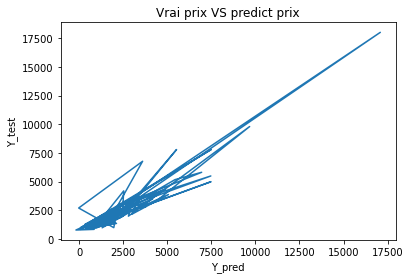

In [82]:
plt.plot(Y_pred,y_test)
plt.ylabel("Y_test")
plt.xlabel("Y_pred")
plt.title("Vrai prix VS predict prix")

In [83]:
def score(y_test,Y_pred):
  res=np.array(y_test-Y_pred)**2
  return(np.mean(res))

In [84]:
score(y_test,Y_pred)

729653.7319769377